La reproducció no és només cosa de dos: hackejant els secrets del microbioma seminal
-----

Imports

In [ ]:
#Datasets
#   https://ddd.uab.cat/record/258024
#   https://dataverse.csuc.cat/dataset.xhtml?persistentId=doi:10.34810/data680
# Extra:  https://www.npatlas.org/about

# https://bitslive.hackersatupc.org/

import pandas as pd
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

Read the file

In [ ]:
family_data=pd.read_csv('./Metadata_and_relative_abundance_of_seminal_microbiota_from_idiopathic_infertile_patients_and_donors.xlsx - Family-level microbiota.csv', na_values=['#DIV/0!'])
genus_data=pd.read_csv('./Metadata_and_relative_abundance_of_seminal_microbiota_from_idiopathic_infertile_patients_and_donors.xlsx - Genus-level microbiota.csv', na_values=['#DIV/0!'])
pylum_data=pd.read_csv('./Metadata_and_relative_abundance_of_seminal_microbiota_from_idiopathic_infertile_patients_and_donors.xlsx - Pylum-level microbiota.csv', na_values=['#DIV/0!'])
metadata=pd.read_csv('./Metadata_and_relative_abundance_of_seminal_microbiota_from_idiopathic_infertile_patients_and_donors.xlsx - Sample info + Sperm quality.csv', na_values=['#DIV/0!'])
pd.set_option('display.max_columns', None)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
metadata["Clinical status"]= metadata["Clinical status"].apply(lambda x: 0 if x=="Infertile" else 1)

In [ ]:
metadata_family_relation = pd.merge(metadata[["Clinical status", "Sample ID"]],family_data , on = 'Sample ID' , how = 'inner')
metadata_pylum_relation = pd.merge(metadata[["Clinical status", "Sample ID"]],pylum_data , on = 'Sample ID' , how = 'inner')
metadata_genus_relation = pd.merge(metadata[["Clinical status", "Sample ID"]],genus_data , on = 'Sample ID' , how = 'inner')

Create correlation matrix Pylum-Metadata
----

[('Firmicutes', 'Proteobacteria'), ('Firmicutes', 'Tenericutes'), ('Bacteroidetes', 'Armatimonadetes'), ('Bacteroidetes', 'Chlorobi'), ('Bacteroidetes', 'Gemmatimonadetes'), ('Bacteroidetes', 'Dictyoglomi'), ('Armatimonadetes', 'Chlorobi'), ('Armatimonadetes', 'Gemmatimonadetes'), ('Armatimonadetes', 'Dictyoglomi'), ('Armatimonadetes', 'Fibrobacteres'), ('Planctomycetes', 'Deinococcus.Thermus'), ('Planctomycetes', 'Deferribacteres'), ('Chlorobi', 'Gemmatimonadetes'), ('Chlorobi', 'Dictyoglomi'), ('Chlorobi', 'Fibrobacteres'), ('Deinococcus.Thermus', 'Deferribacteres'), ('Chlamydiae', 'Nitrospirae')]


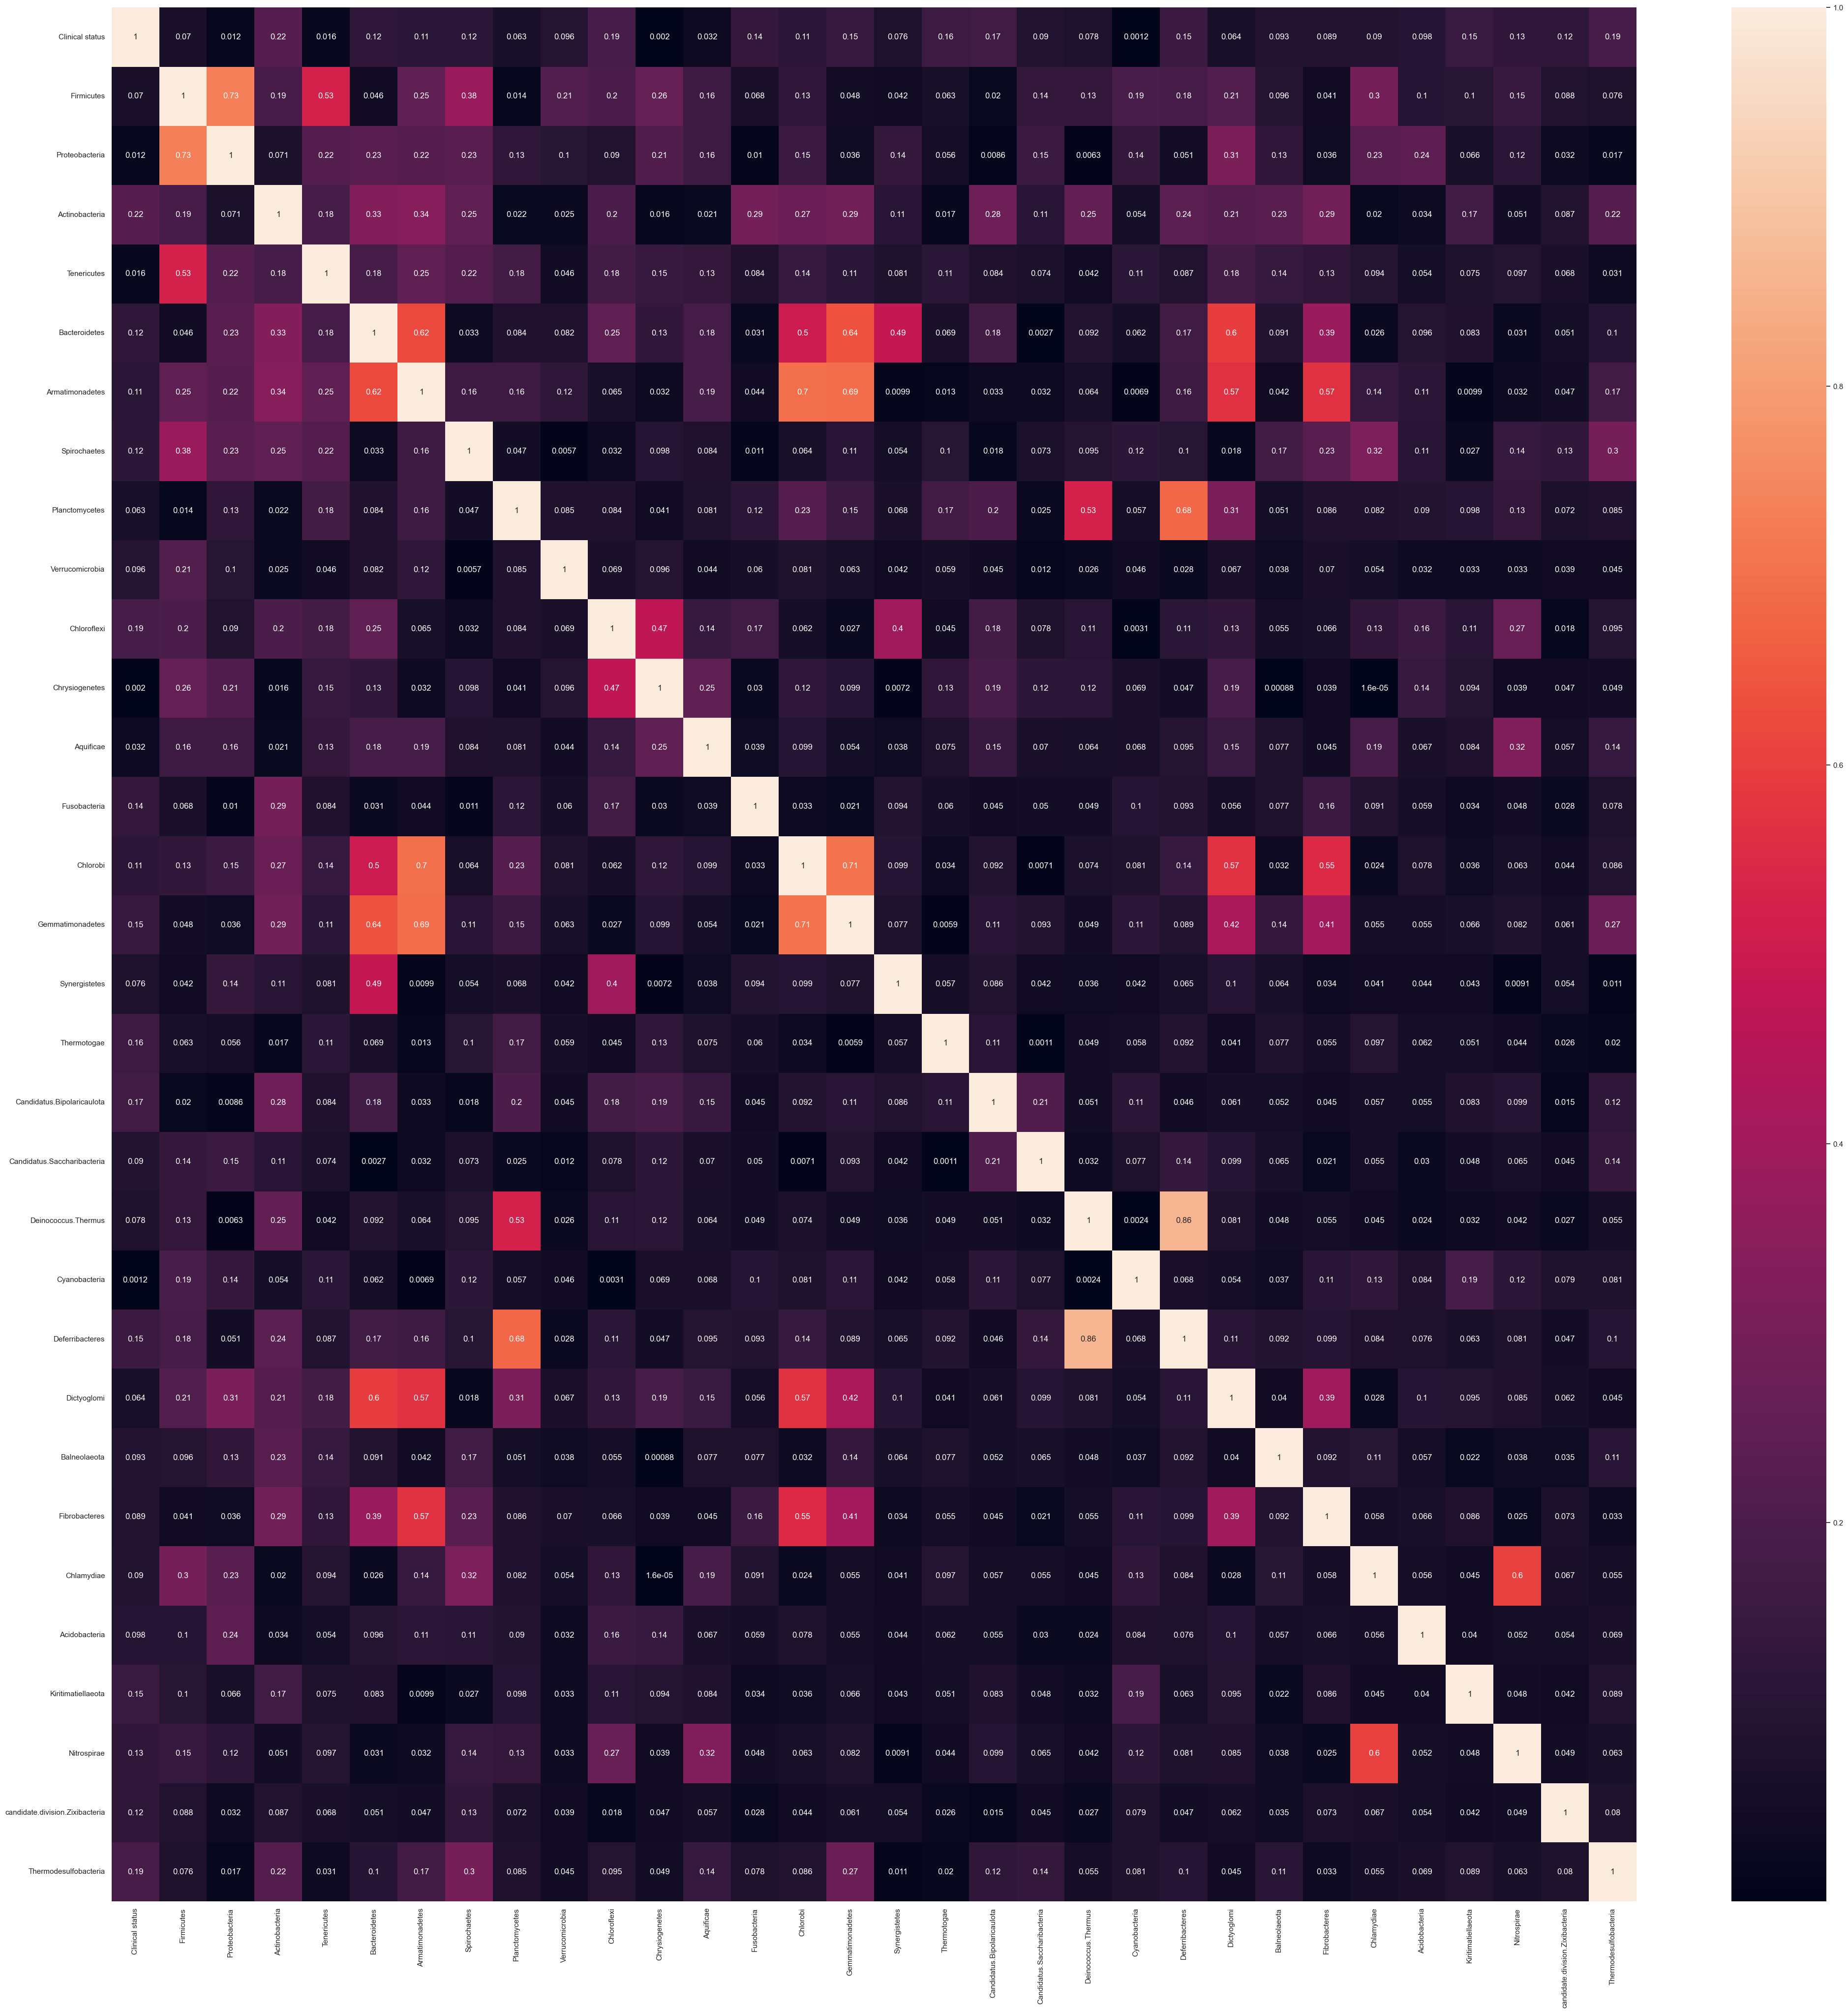

In [ ]:
corr_matrix = metadata_pylum_relation.corr(numeric_only=True).abs()

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True)



In [ ]:
corr_matrix = metadata_pylum_relation.corr(numeric_only=True).abs()
high_corr_var=np.where(corr_matrix>0.6)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

#for (i,j) in high_corr_var:
#  if i!=j:
#    ax1 = metadata_pylum_relation.plot.scatter(x=i,
#                        y=j,
#                        c='DarkBlue')


[('Firmicutes', 'Proteobacteria'), ('Bacteroidetes', 'Armatimonadetes'), ('Bacteroidetes', 'Gemmatimonadetes'), ('Armatimonadetes', 'Chlorobi'), ('Armatimonadetes', 'Gemmatimonadetes'), ('Planctomycetes', 'Deferribacteres'), ('Chlorobi', 'Gemmatimonadetes'), ('Deinococcus.Thermus', 'Deferribacteres')]


Create correlation matrix Family-Metadata
-----

[('Campylobacteraceae', 'Aerococcaceae'), ('Campylobacteraceae', 'Desulfurobacteriaceae'), ('Campylobacteraceae', 'Cryomorphaceae'), ('Streptococcaceae', 'Desulfurellaceae'), ('Streptococcaceae', 'Microcystaceae'), ('Moraxellaceae', 'Mycoplasmataceae'), ('Moraxellaceae', 'Rhodobacteraceae'), ('Moraxellaceae', 'Flavobacteriaceae'), ('Moraxellaceae', 'Rhizobiaceae'), ('Moraxellaceae', 'Microbacteriaceae'), ('Moraxellaceae', 'Hydrogenophilaceae'), ('Moraxellaceae', 'Hyphomicrobiaceae'), ('Moraxellaceae', 'Aurantimonadaceae'), ('Moraxellaceae', 'Dietziaceae'), ('Moraxellaceae', 'Rhodobiaceae'), ('Moraxellaceae', 'Sanguibacteraceae'), ('Moraxellaceae', 'Francisellaceae'), ('Moraxellaceae', 'Ruaniaceae'), ('Staphylococcaceae', 'Candidatus.Midichloriaceae'), ('Staphylococcaceae', 'Microcystaceae'), ('Prevotellaceae', 'Veillonellaceae'), ('Prevotellaceae', 'Bacteroidaceae'), ('Prevotellaceae', 'Synergistaceae'), ('Prevotellaceae', 'Sutterellaceae'), ('Prevotellaceae', 'Gemmatimonadaceae'), ('P

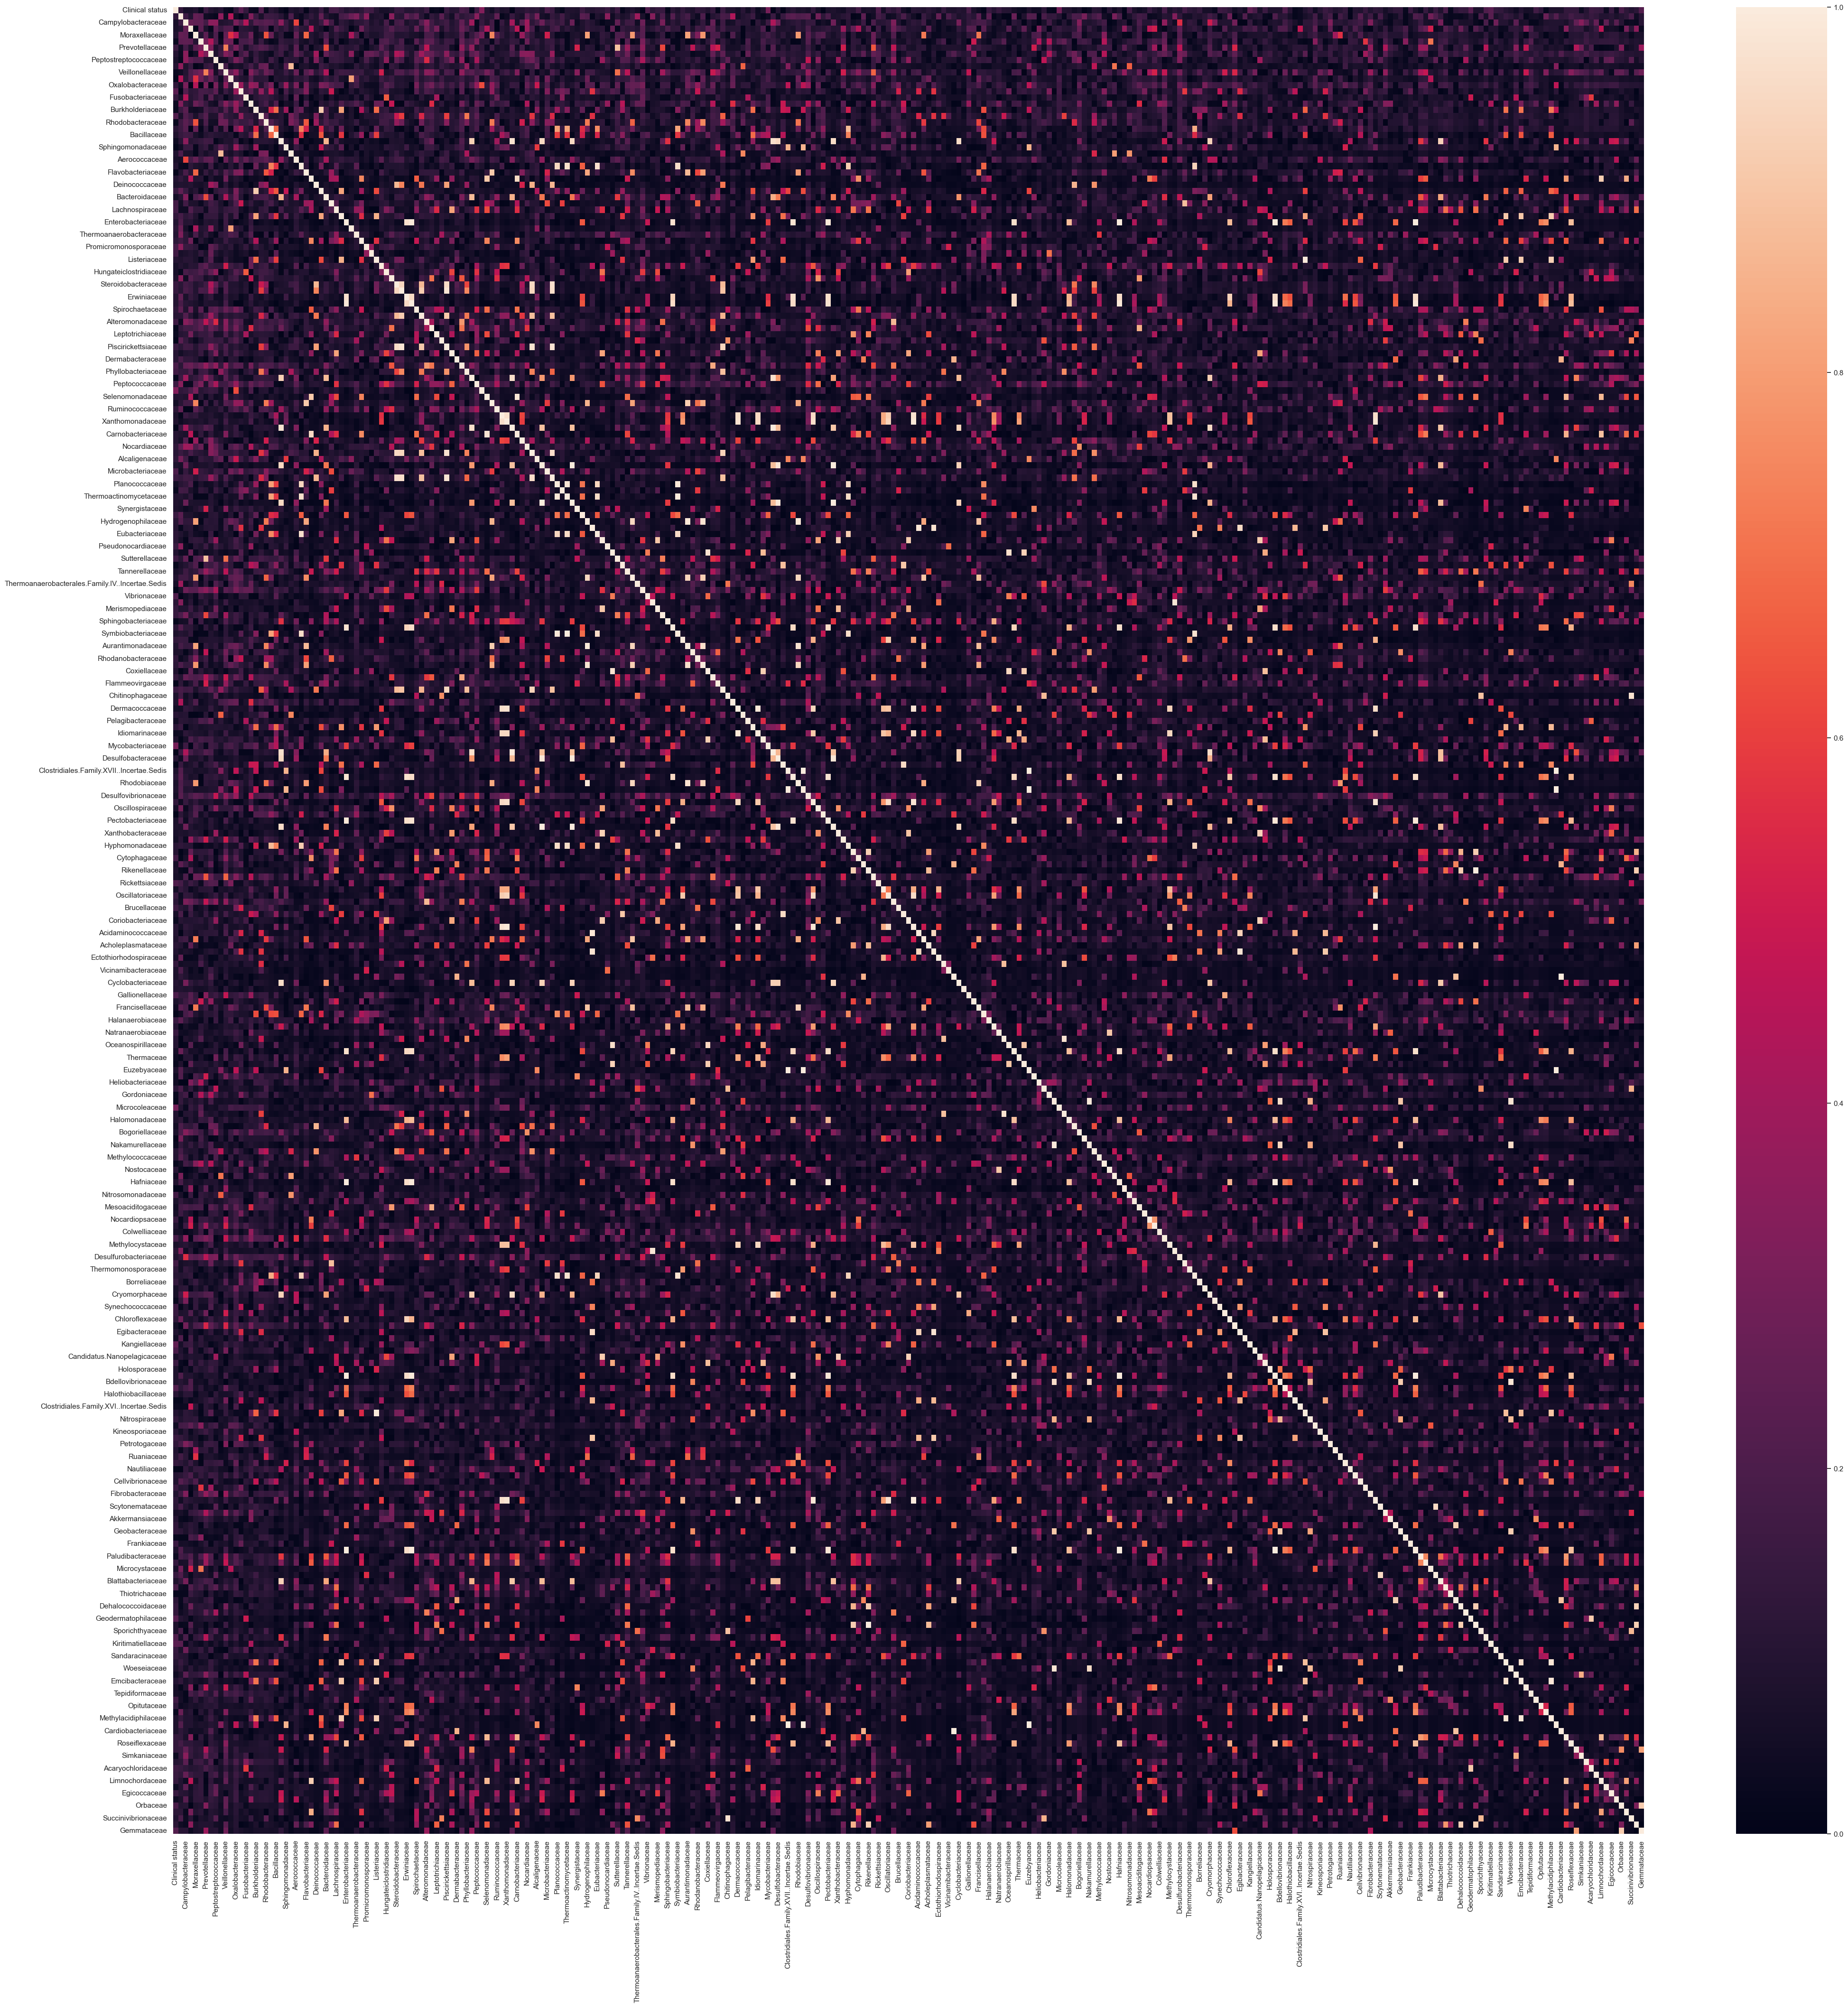

In [ ]:
corr_matrix = metadata_family_relation.corr(numeric_only=True).abs()

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=False)



In [ ]:
corr_matrix = metadata_family_relation.corr(numeric_only=True).abs()
high_corr_var=np.where(corr_matrix>0.9985)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('Dysgonamonadaceae', 'Leuconostocaceae'), ('Dysgonamonadaceae', 'Streptosporangiaceae'), ('Clostridiales.Family.XVII..Incertae.Sedis', 'Acidobacteriaceae'), ('Clostridiales.Family.XVII..Incertae.Sedis', 'Rhodocyclaceae'), ('Acidobacteriaceae', 'Rhodocyclaceae'), ('Psychromonadaceae', 'Cardiobacteriaceae'), ('Moritellaceae', 'Budviciaceae')]


Create correlation matrix Genus-Metadata
-----

[('Finegoldia', 'Xylanimonas'), ('Finegoldia', 'Pseudonocardia'), ('Peptoniphilus', 'Thermoanaerobacterium'), ('Peptoniphilus', 'Rhodococcus'), ('Peptoniphilus', 'Faecalibacterium'), ('Peptoniphilus', 'Halobacteroides'), ('Peptoniphilus', 'Desulfovibrio'), ('Peptoniphilus', 'Oscillibacter'), ('Peptoniphilus', 'Athalassotoga'), ('Anaerococcus', 'Parvimonas'), ('Anaerococcus', 'Sneathia'), ('Anaerococcus', 'Ruminococcus'), ('Anaerococcus', 'Lentibacillus'), ('Anaerococcus', 'Candidatus.Pelagibacter'), ('Anaerococcus', 'Streptobacillus'), ('Anaerococcus', 'Sebaldella'), ('Anaerococcus', 'Saccharopolyspora'), ('Anaerococcus', 'Acaryochloris'), ('Anaerococcus', 'Adlercreutzia'), ('Campylobacter', 'Aerococcus'), ('Campylobacter', 'Sulfurospirillum'), ('Campylobacter', 'Desulfitobacterium'), ('Campylobacter', 'Owenweeksia'), ('Streptococcus', 'Desulfurella'), ('Streptococcus', 'Gluconobacter'), ('Streptococcus', 'Microcystis'), ('Staphylococcus', 'Sporosarcina'), ('Staphylococcus', 'Planococc

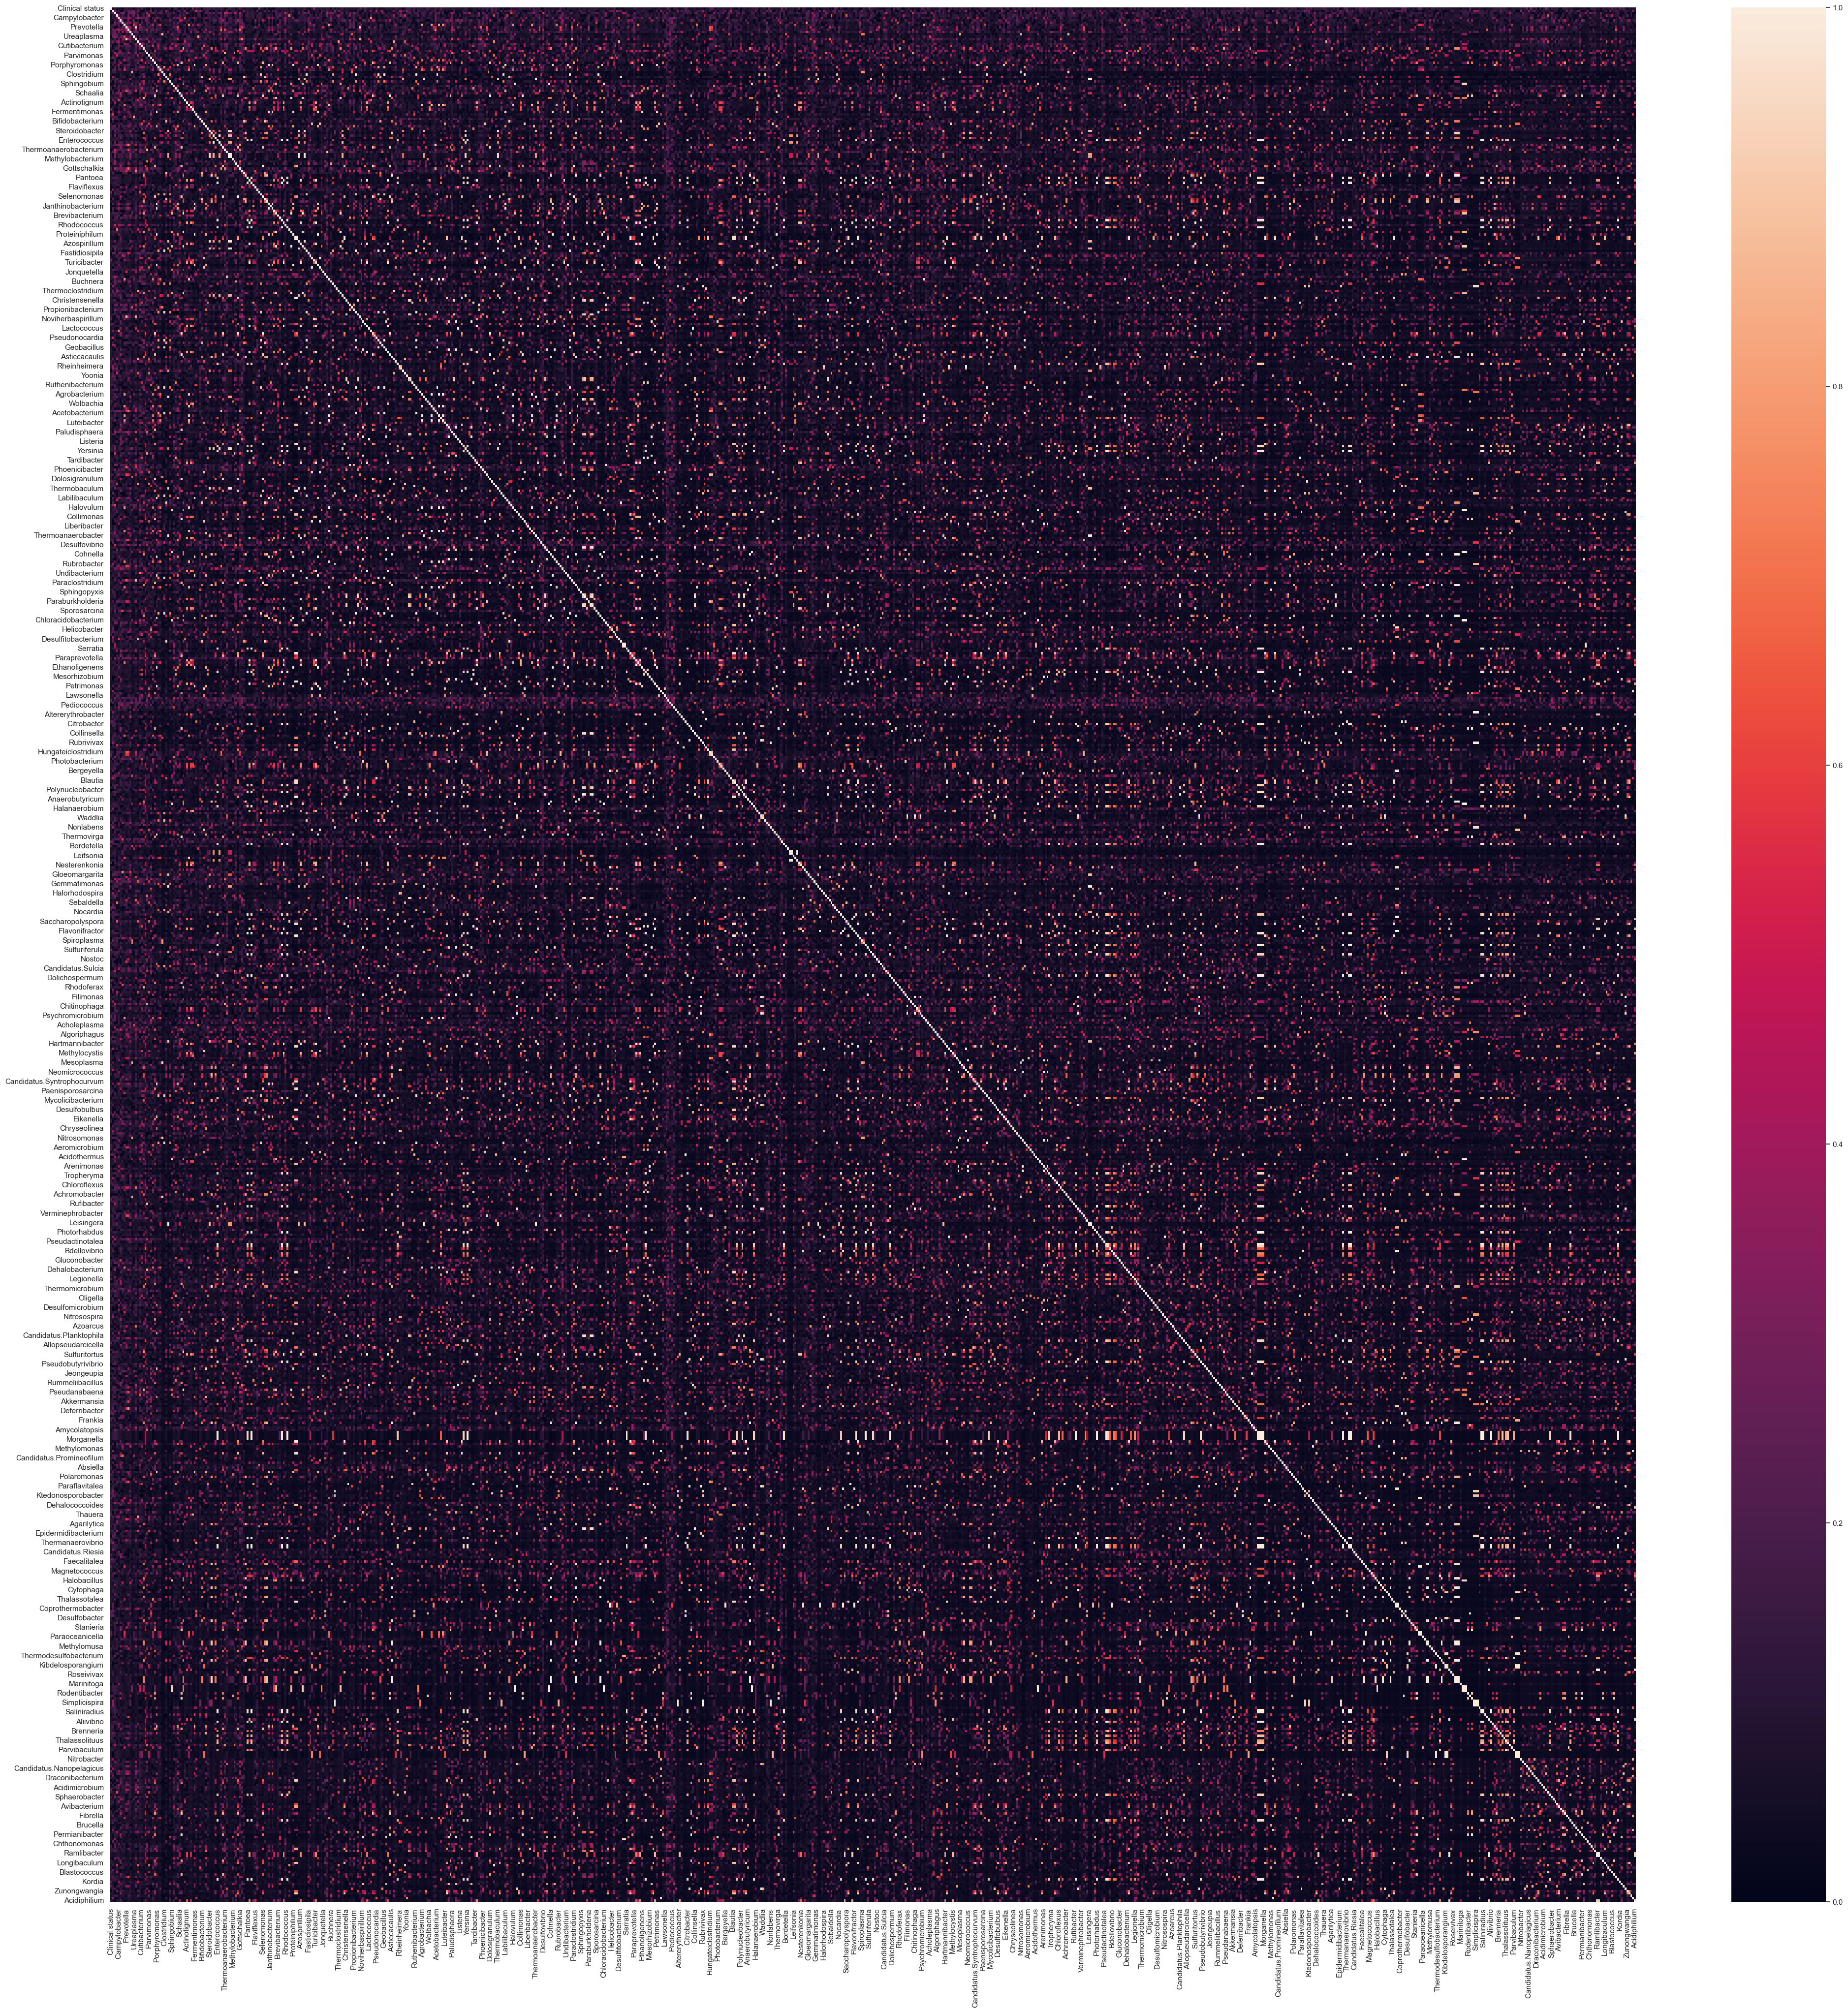

In [ ]:
corr_matrix = metadata_genus_relation.corr(numeric_only=True).abs()

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=False)


In [ ]:
corr_matrix = metadata_genus_relation.corr(numeric_only=True).abs()

high_corr_var=np.where(corr_matrix>0.5)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)